In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf


from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from sklearn.cluster import OPTICS

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

angles=4
train_limit=30000
x_train = (x_train.astype('float32') / 255.)[:train_limit]
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)
ref_idx=3

(30000, 28, 28)
(10000, 28, 28)


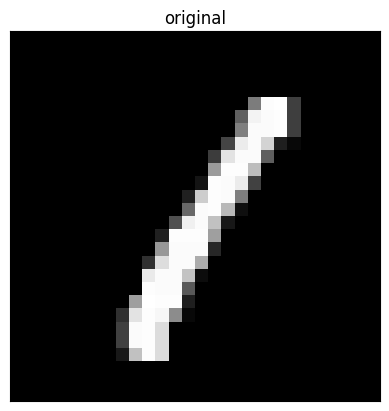

In [3]:
ax = plt.subplot()
plt.imshow(x_train[ref_idx])
plt.title("original")
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

(28, 28)


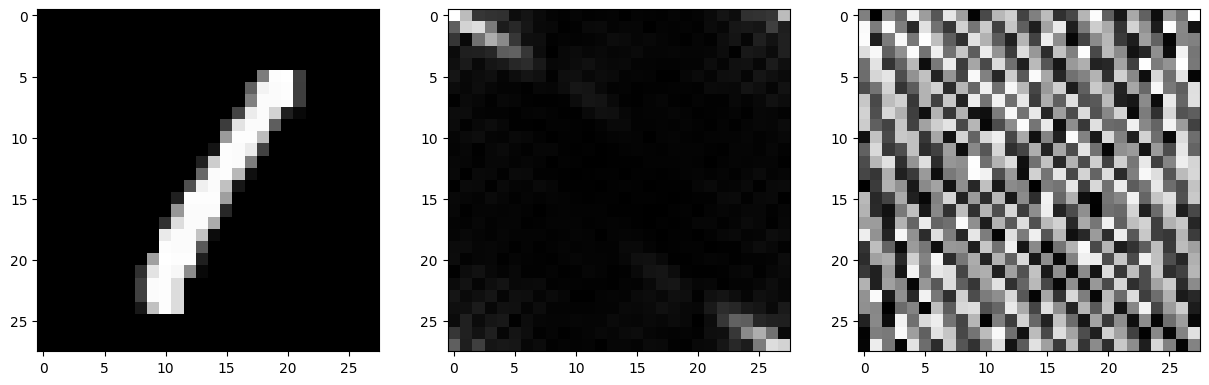

In [4]:
plain_image=np.fft.fft2(x_train[ref_idx])
magnitude_plain=np.abs(plain_image)
phase_plain=np.angle(plain_image)
print(plain_image.shape)

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
ax[0].imshow(x_train[ref_idx])
ax[1].imshow(magnitude_plain)
ax[2].imshow(phase_plain)
plt.gray()

(28, 28)


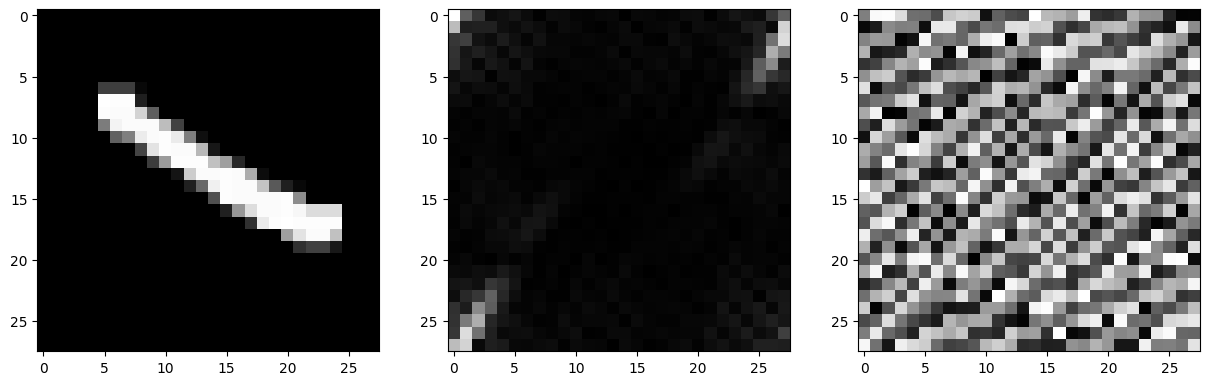

In [5]:
rotated_image=np.rot90(x_train[ref_idx], k=1)  # k=1 for a 90-degree rotation
rotated_ft=np.fft.fft2(rotated_image)
magnitude_rotated=np.abs(rotated_ft)
phase_rotated=np.angle(rotated_ft)
print(rotated_image.shape)

fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
ax[0].imshow(rotated_image)
ax[1].imshow(magnitude_rotated)
ax[2].imshow(phase_rotated)
plt.gray()

2590.755019528696
2590.755019528696


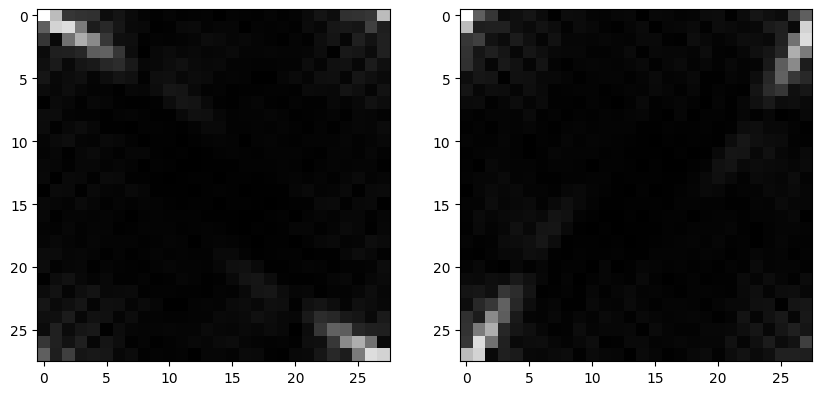

In [6]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
ax[0].imshow(magnitude_plain)
ax[1].imshow(magnitude_rotated)
plt.gray()
print(magnitude_plain.flatten().sum())
print(magnitude_rotated.flatten().sum())

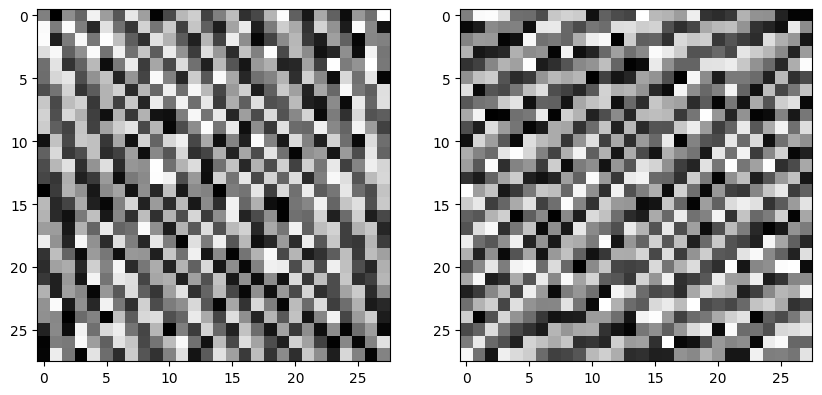

In [7]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
ax[0].imshow(phase_plain)
ax[1].imshow(phase_rotated)
plt.gray()